# Automatic anomaly detection using the Brildata model 

Lets begin by importing our packages and loading our data.

In [1]:
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from src.model.searcher import AnomalySearcher
from src.data.mounting_tool import MountData

### Importing and cleaning the data

In setmount we have a little script to create the mount to the dessired data.
Modify the bash script to make it work for your computing account and cmsusr


In [3]:
MOUNT_TARGET = "/afs/cern.ch/user/j/jmunozar/private/InProcess/plt/mounts/h5s/"

In [5]:
with open('../secrets.json', "r") as f:
    config = json.load(f)
mounter = MountData(user="jmunozar", password=config["pass"])
mounter.create_mount(mount_source="brildev1:/brildata/22/", 
                     mount_target=MOUNT_TARGET)

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


# Usage

To create a anomaly detector, simply provide the `AnomalySearcher` class the path to where the brildata is mounted

In [6]:
anm_searcher = AnomalySearcher(MOUNT_TARGET)

And now, lets select a Fill to analyze, this is direct:

KeyboardInterrupt: 

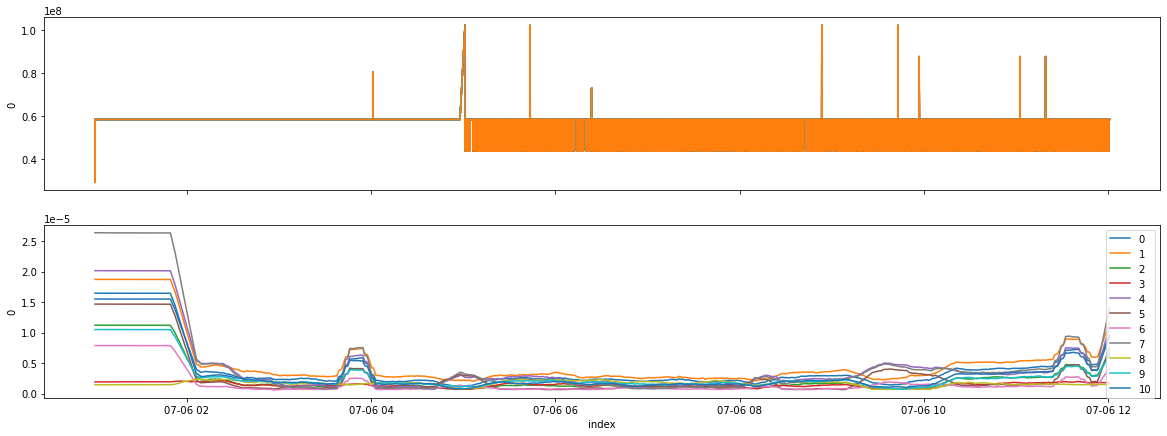

In [7]:
FILL_N = 7921
anomaly_dict = anm_searcher(FILL_N,
                            return_preprocessed=True,
                            generate_plots=True,
                            save_path = f"/afs/cern.ch/user/j/jmunozar/private/InProcess/anomalies_results")

That is it, the report was generated and stored in `save_path`.

### Running for all files

In [10]:
AnomalySearcher().run_scan(
    mount_path="/afs/cern.ch/user/j/jmunozar/private/ProjectsSummer2022/Files/mnt22",
    output_path="/afs/cern.ch/user/j/jmunozar/private/ProjectsSummer2022/MeetingResults",
    make_anomalous_plots=True,
    overwrite=False,
    progress_bar=True,
)

  0%|          | 0/456 [00:00<?, ?it/s]